In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [39]:
df = pd.read_csv('tabular/final_tracks.csv', skipinitialspace=False)

In [40]:
df.columns

Index(['name', 'duration_ms', 'explicit', 'popularity', 'artists',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'tempo_confidence', 'time_signature_confidence',
       'key_confidence', 'mode_confidence', 'genre', 'id'],
      dtype='object')

# Data partitioning

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [42]:
y = df["genre"]
X = df.drop(columns=["id", "name", "artists", "genre"])

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=8)

In [44]:
scl = StandardScaler()
X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)

# Random Forests

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
clf = RandomForestClassifier(n_estimators=100, 
                             criterion='gini', 
                             max_depth=None, 
                             min_samples_split=2, 
                             min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, 
                             random_state=8, 
                             n_jobs=-1)

### Random Search

In [18]:
from sklearn.model_selection import RandomizedSearchCV

In [17]:
param_list = {
              'criterion': ["gini", "entropy"],
              'max_depth': [None] + list(np.arange(2, 30)),
              'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
            'min_weight_fraction_leaf': [0.0, 0.2, 0.5, 0.7],
                'max_features': ["sqrt", "log2", None],
            'bootstrap': [True, False],
    
    
             }

random_search = RandomizedSearchCV(clf, param_distributions=param_list, n_iter=40, cv=5)
random_search.fit(X_train, y_train)
clf = random_search.best_estimator_


y_pred = clf.predict(X_test)

print("Best Estimator: ", random_search.best_estimator_)
print("Best Params: ", random_search.best_params_)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
#print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

NameError: name 'RandomizedSearchCV' is not defined

### RandomSearchCV results
Best Estimator:  RandomForestClassifier(max_depth=20, max_features='log2', min_samples_leaf=10,
                       min_samples_split=20, n_estimators=500, n_jobs=-1,
                       random_state=8)
Best Params:  {'min_weight_fraction_leaf': 0.0, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'gini', 'bootstrap': True}
Accuracy 0.3538870801238784

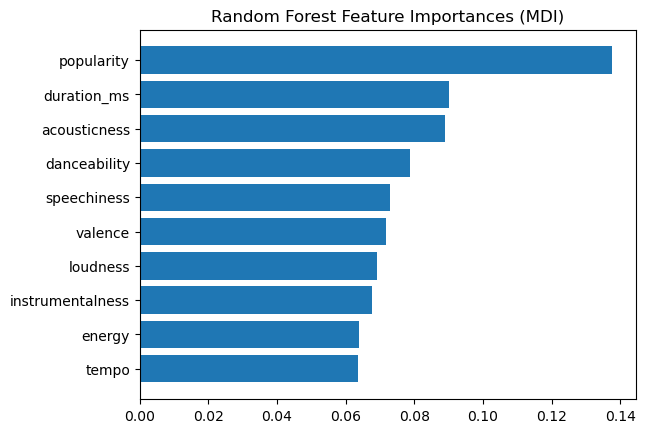

In [20]:
nbr_features = 10

tree_feature_importances = clf.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]

y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(X.columns)[sorted_idx])
plt.title("Random Forest Feature Importances (MDI)")
plt.show()

### Parametri a mano

In [19]:
clf = RandomForestClassifier(max_depth=20, max_features='log2', min_samples_leaf=10,
                       min_samples_split=20, n_estimators=100, n_jobs=-1,
                       random_state=8)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.3479313904550147
F1-score [0.20985692 0.33802817 0.         0.03015075 0.375      0.16296296
 0.52531646 0.38344828 0.03370787 0.14457831 0.36397749 0.04395604
 0.27027027 0.47302905 0.39721254 0.12537313 0.56398104 0.26004728
 0.82532751 0.24523161 0.04081633 0.1552795  0.23353293 0.16312057
 0.47222222 0.23452769 0.31443299 0.59574468 0.27703985 0.
 0.         0.06666667 0.01257862 0.18660287 0.         0.40726329
 0.24847251 0.31481481 0.14243323 0.03278689 0.33110368 0.05504587
 0.76379066 0.18274112 0.24283765 0.31965443 0.49345794 0.18729097
 0.34331337 0.55183946 0.34036939 0.2372093  0.59445178 0.31358885
 0.33214286 0.14795918 0.         0.06091371 0.22330097 0.53529412
 0.43018868 0.49772382 0.19662921 0.1640625  0.18543046 0.31610044
 0.49150327 0.12903226 0.03125    0.12863071 0.32686981 0.04819277
 0.34732272 0.35117773 0.11428571 0.5361552  0.46917808 0.50106157
 0.47226624 0.5027933  0.08484848 0.40320427 0.340625   0.32954545
 0.23167849 0.         0.17391304

C:\Users\fabio\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                   precision    recall  f1-score   support

         acoustic       0.18      0.25      0.21       269
         afrobeat       0.36      0.32      0.34       301
         alt-rock       0.00      0.00      0.00       101
      alternative       0.05      0.02      0.03       143
          ambient       0.36      0.39      0.38       261
            anime       0.37      0.10      0.16       210
      black-metal       0.46      0.61      0.53       273
        bluegrass       0.34      0.44      0.38       313
            blues       0.33      0.02      0.03       169
           brazil       0.30      0.10      0.14       252
        breakbeat       0.42      0.32      0.36       303
          british       0.80      0.02      0.04       177
         cantopop       0.25      0.29      0.27       255
    chicago-house       0.39      0.61      0.47       279
         children       0.40      0.39      0.40       292
            chill       0.16      0.10      0.13       

C:\Users\fabio\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fabio\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Effetto di cambiare n_estimators

50
Accuracy 0.3401492892876995
F1-score 0.27008343061853085
100
Accuracy 0.3479313904550147
F1-score 0.2772141495791643
150
Accuracy 0.3483681410307314
F1-score 0.27726685421336755
200
Accuracy 0.3510680536806162
F1-score 0.2798403748542495
250
Accuracy 0.3525768283967283
F1-score 0.28135429261511297
300
Accuracy 0.35210037322321924
F1-score 0.2804624199252351
400
Accuracy 0.35293416977686015
F1-score 0.2811143895323603
500
Accuracy 0.3538870801238784
F1-score 0.2822896232325866
600
Accuracy 0.3540856031128405
F1-score 0.28229250353304247
700
Accuracy 0.35416501230842534
F1-score 0.2823874204846072


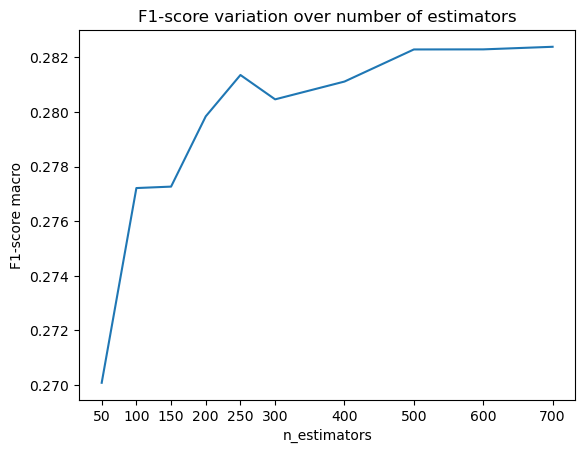

In [21]:
#setta i parametri manualmente
x = [50, 100, 150, 200, 250, 300, 400, 500, 600, 700]
y = []
for n in x:
    clf = RandomForestClassifier(max_depth=20, max_features='log2', min_samples_leaf=10,
                       min_samples_split=20, n_estimators=n, n_jobs=-1,
                       random_state=8)
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print(n)
    print('Accuracy %s' % accuracy_score(y_test, y_pred))
    print('F1-score %s' % f1_score(y_test, y_pred, average="macro"))
    y.append(f1_score(y_test, y_pred, average="macro"))
    #print("\n\n")
    
# Plotting
plt.plot(x, y)

plt.xticks(x)

# Adding labels and title
plt.xlabel('n_estimators')
plt.ylabel('F1-score macro')
plt.title('F1-score variation over number of estimators')

# Display the plot
plt.show()
#print(classification_report(y_test, y_pred))

### ROC Curve

In [29]:
from scikitplot.metrics import plot_roc
from sklearn.model_selection import cross_val_predict

In [45]:
y_pred_prob = cross_val_predict(clf, X, y, cv=3, method='predict_proba')

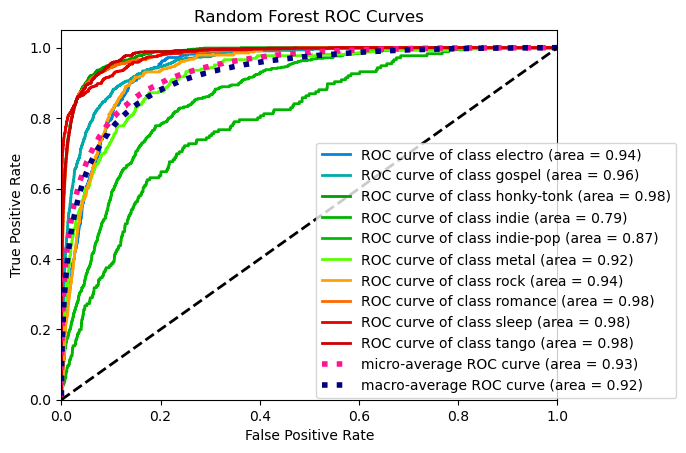

In [52]:
plot_roc(y, y_pred_prob, classes_to_plot=["sleep", "honky-tonk", "tango", "gospel", "romance", "indie", "electro", "rock", "metal", "indie-pop"])
plt.legend(loc='center left',prop={'size': 10}, bbox_to_anchor=(0.5, 0.35))
plt.title("Random Forest ROC Curves")
plt.show()